# Dog Emotion Detection


## 1. Data preparation

Source: https://www.kaggle.com/datasets/danielshanbalico/dog-emotion

In [3]:
# Import libraries
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import random
import collections
import torch.nn as nn
from torchvision import models
import torch.optim as optim
import os
from tqdm import tqdm

In [10]:
# Define data directory and transformations
data_dir = 'DogEmotion/train'

# Define image transformations for training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    # transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create a custom dataset
dataset = ImageFolder(data_dir, transform=transform)

# Calculate the sizes of train, validation, and test sets
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

# Split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size]
)

# Create DataLoader instances for training, validation, and testing
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Count the number of samples for each label in the train set
label_counts = collections.Counter(train_dataset.dataset.targets)
labels, counts = zip(*label_counts.items())


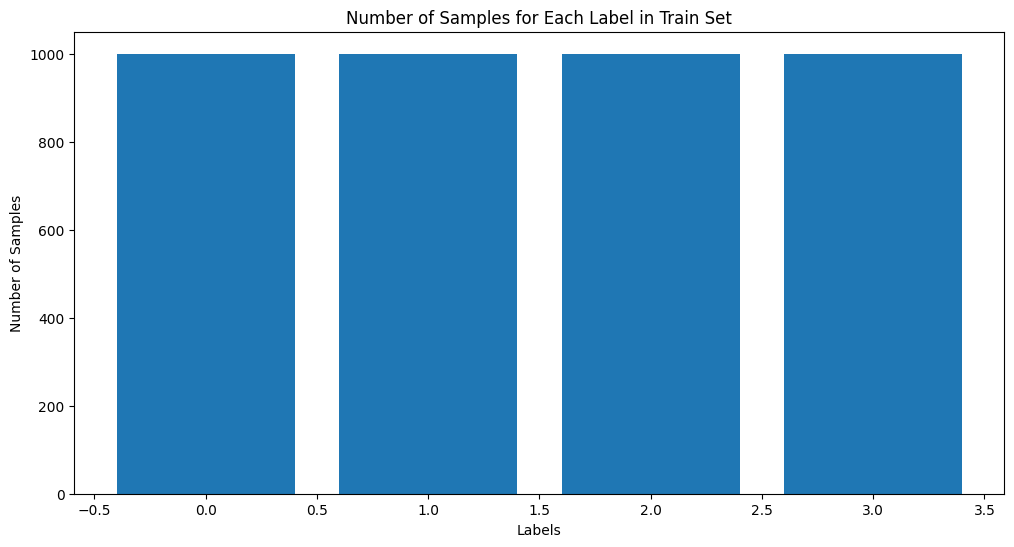

In [5]:
# Plot the number of samples for each label
plt.figure(figsize=(12, 6))
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Number of Samples for Each Label in Train Set')
plt.xticks()
plt.show()

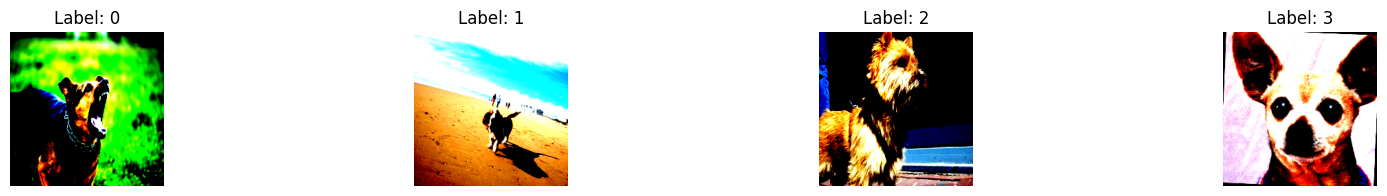

In [6]:
# Function to find the index of the first occurrence of a given label
def find_first_occurrence_label(dataset, label):
    for i, (data, target) in enumerate(dataset):
        if target == label:
            return i

# Number of classes
num_classes = len(label_counts)

# Create a subplot for each class and plot one random image from that class
fig, axs = plt.subplots(1, num_classes, figsize=(20, 2))

for i, label in enumerate(sorted(labels)):
    first_occurrence_index = find_first_occurrence_label(train_dataset, label)
    image, _ = train_dataset[first_occurrence_index]

    # Display the image with the label value
    axs[i].imshow(image.permute(1, 2, 0))  # Permute to (H, W, C) format
    axs[i].set_title(f"Label: {label}")
    axs[i].axis("off")

plt.show()

## 2. Model selection

In [14]:
import torch.nn.init as init
# Load the pre-trained ResNet model
model = models.resnet18(pretrained=True)

# Modify the final classification layer to match the number of classes in your dataset
num_classes = len(dataset.classes)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 2048),  # Add a hidden layer
    nn.ReLU(),  # Apply ReLU activation function
    nn.Dropout(0.5),  # Apply dropout
    nn.Linear(2048, num_classes)  # Output layer with the number of classes
)

# # Initialize the weights of the added layers with He initialization
# for layer in model.fc.children():
#     if isinstance(layer, nn.Linear):
#         # Use He initialization for linear layers
#         init.kaiming_uniform_(layer.weight, mode='fan_in', nonlinearity='relu')
#         # Optionally, initialize biases to zeros
#         if layer.bias is not None:
#             init.constant_(layer.bias, 0)

# Define the loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam([
    {'params': model.parameters(), 'lr': 1e-4, 'weight_decay': 1e-3}
    ]
)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 3. Training

Epoch 1/20, Training Loss: 0.9564066766337915, Training Accuracy: 59.43%


Validation Loss: 0.6347595930099488, Validation Accuracy: 72.17%


Epoch 2/20, Training Loss: 0.42388768561861734, Training Accuracy: 84.68%


Validation Loss: 0.4883325666189194, Validation Accuracy: 79.83%


Epoch 3/20, Training Loss: 0.17746070670810613, Training Accuracy: 94.21%


Validation Loss: 0.42616637498140336, Validation Accuracy: 83.83%


Epoch 4/20, Training Loss: 0.08786216073415497, Training Accuracy: 97.39%


Validation Loss: 0.4552707731723785, Validation Accuracy: 85.50%


Epoch 5/20, Training Loss: 0.05408909711563452, Training Accuracy: 98.43%


Validation Loss: 0.48244056552648545, Validation Accuracy: 84.83%


Epoch 6/20, Training Loss: 0.03910008500414816, Training Accuracy: 99.00%


Validation Loss: 0.5202803060412406, Validation Accuracy: 86.17%


Epoch 7/20, Training Loss: 0.022689264045435597, Training Accuracy: 99.36%


Validation Loss: 0.46912750899791716, Validation Accuracy: 86.83%


Epoch 8/20, Training Loss: 0.016176496087361804, Training Accuracy: 99.57%


Validation Loss: 0.5137288853526115, Validation Accuracy: 87.50%


Epoch 9/20, Training Loss: 0.015936016475527802, Training Accuracy: 99.50%


Validation Loss: 0.4748022884130478, Validation Accuracy: 86.50%


Epoch 10/20, Training Loss: 0.015022586905450391, Training Accuracy: 99.54%


Validation Loss: 0.4565246865153313, Validation Accuracy: 89.17%


Epoch 11/20, Training Loss: 0.02162477373547683, Training Accuracy: 99.36%


Validation Loss: 0.6485801607370376, Validation Accuracy: 83.50%


Epoch 12/20, Training Loss: 0.02231340300799771, Training Accuracy: 99.43%


Validation Loss: 0.5054171323776245, Validation Accuracy: 86.33%


Epoch 13/20, Training Loss: 0.01764912907806733, Training Accuracy: 99.61%


Validation Loss: 0.5257017016410828, Validation Accuracy: 87.00%


Epoch 14/20, Training Loss: 0.017885374161943964, Training Accuracy: 99.50%


Validation Loss: 0.6442677050828933, Validation Accuracy: 86.50%


Epoch 15/20, Training Loss: 0.020329188706289806, Training Accuracy: 99.36%


Validation Loss: 0.6683341681957244, Validation Accuracy: 85.33%


Epoch 16/20, Training Loss: 0.018685368717838588, Training Accuracy: 99.39%


Validation Loss: 0.6353734701871872, Validation Accuracy: 85.83%


Epoch 17/20, Training Loss: 0.03347763780303384, Training Accuracy: 98.75%


Validation Loss: 0.5540148936212063, Validation Accuracy: 87.00%


Epoch 18/20, Training Loss: 0.035094612061088395, Training Accuracy: 98.79%


Validation Loss: 0.663858363032341, Validation Accuracy: 84.50%


Epoch 19/20, Training Loss: 0.024784357522466136, Training Accuracy: 99.46%


Validation Loss: 0.6124064475297928, Validation Accuracy: 85.67%


Epoch 20/20, Training Loss: 0.020609231512273916, Training Accuracy: 99.21%


Validation Loss: 0.6635847061872482, Validation Accuracy: 84.50%


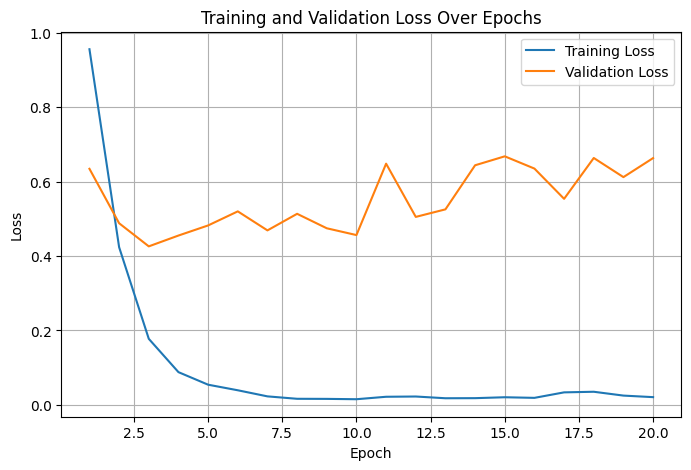

In [15]:
import os
import torch

# Define the number of epochs and the save interval
num_epochs = 20
save_interval = 1

# Define the directory to save model checkpoints
checkpoint_dir = 'model'
os.makedirs(checkpoint_dir, exist_ok=True)

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Lists to store training and validation loss values
train_loss_history = []
val_loss_history = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    # Create a progress bar for the training process
    train_progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)

    for inputs, labels in train_progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Update progress bar description
        accuracy = 100 * correct / total
        train_progress_bar.set_postfix(loss=f'{running_loss/len(train_loader):.4f}', accuracy=f'{accuracy:.2f}%')

    train_progress_bar.close()

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss/len(train_loader)}, Training Accuracy: {accuracy:.2f}%")

    # Perform validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    # Create a progress bar for the validation process
    val_progress_bar = tqdm(val_loader, desc=f'Validation', leave=False)

    with torch.no_grad():  # Disable gradient calculation for validation
        for val_inputs, val_labels in val_progress_bar:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()

            # Calculate validation accuracy
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
    val_progress_bar.close()

    val_accuracy = 100 * val_correct / val_total
    print(f"Validation Loss: {val_loss/len(val_loader)}, Validation Accuracy: {val_accuracy:.2f}%")

    # Append training and validation loss to their respective lists
    train_loss_history.append(running_loss / len(train_loader))
    val_loss_history.append(val_loss / len(val_loader))

    # Save the model every save_interval epochs
    if (epoch + 1) % save_interval == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'resnet18_epoch{epoch+1}.pth')
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': running_loss / len(train_loader),
            'val_loss': val_loss / len(val_loader),
            'val_accuracy': val_accuracy
        }, checkpoint_path)

# Save the final model
final_checkpoint_path = os.path.join(checkpoint_dir, 'resnet18_final.pth')
final_checkpoint_path = './model_test.pth'
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': running_loss / len(train_loader),
    'val_loss': val_loss / len(val_loader),
    'val_accuracy': val_accuracy
}, final_checkpoint_path)

# Plot both training and validation loss curves
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


## 4. Testing

In [25]:
model = models.resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 2048),
    nn.ReLU(),  # Apply ReLU activation function
    nn.Dropout(0.5),  # Apply dropout
    nn.Linear(2048, num_classes)  # Output layer with the number of classes
)
# Load the trained model weights
checkpoint_path = 'model/resnet18_epoch3.pth'  # Update with your model checkpoint path
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Evaluate the model on the test dataset
model.eval()
correct = 0
total = 0

test_progress_bar = tqdm(test_loader, desc=f'Test', leave=False)
# with torch.no_grad():
for inputs, labels in test_progress_bar:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 84.00%


## 5. Inference

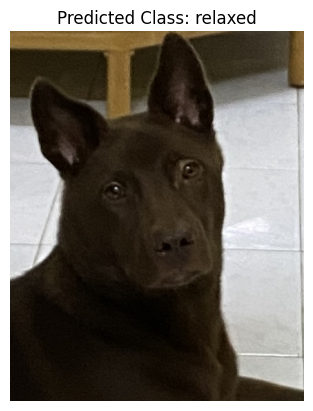

In [26]:
from PIL import Image

# Define the model architecture
model = models.resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 2048),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(2048, num_classes)
)

# Load the trained model weights
checkpoint_path = 'model/resnet18_epoch3.pth'  # Update with your model checkpoint path
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Load and preprocess the input image
image_path = 'Relaxed.jpg'  # Replace with the path to your input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

with torch.no_grad():
    image = Image.open(image_path)
    input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU

    # Perform inference
    outputs = model(input_image)
    _, predicted = torch.max(outputs.data, 1)

# Decode the predicted label
class_labels = ['angry', 'happy', 'relaxed', 'sad']
predicted_label = class_labels[predicted.item()]

# Plot the image with actual and predicted labels
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis("off")
plt.show()


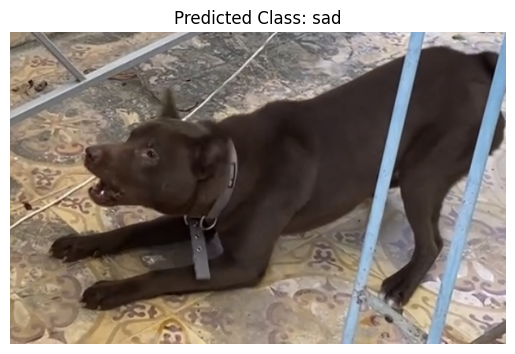

In [27]:
from PIL import Image

# Define the model architecture
model = models.resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 2048),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(2048, num_classes)
)

# Load the trained model weights
checkpoint_path = 'model/resnet18_epoch3.pth'  # Update with your model checkpoint path
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Load and preprocess the input image
image_path = 'Angry.jpg'  # Replace with the path to your input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

with torch.no_grad():
    image = Image.open(image_path)
    input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU

    # Perform inference
    outputs = model(input_image)
    _, predicted = torch.max(outputs.data, 1)

# Decode the predicted label
class_labels = ['angry', 'happy', 'relaxed', 'sad']
predicted_label = class_labels[predicted.item()]

# Plot the image with actual and predicted labels
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis("off")
plt.show()


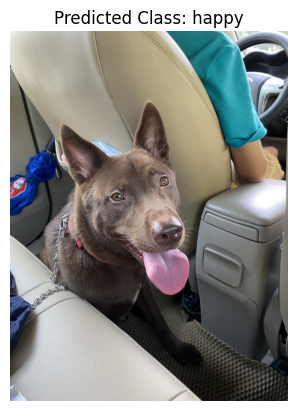

In [28]:
from PIL import Image

# Define the model architecture
model = models.resnet18(pretrained=True)
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 2048),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(2048, num_classes)
)

# Load the trained model weights
checkpoint_path = 'model/resnet18_epoch3.pth'  # Update with your model checkpoint path
checkpoint = torch.load(checkpoint_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Load and preprocess the input image
image_path = 'Happy.jpg'  # Replace with the path to your input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

with torch.no_grad():
    image = Image.open(image_path)
    input_image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to GPU

    # Perform inference
    outputs = model(input_image)
    _, predicted = torch.max(outputs.data, 1)

# Decode the predicted label
class_labels = ['angry', 'happy', 'relaxed', 'sad']
predicted_label = class_labels[predicted.item()]

# Plot the image with actual and predicted labels
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_label}")
plt.axis("off")
plt.show()
